## Model Code and Exploration 

### Exploratory Data Analysis (EDA) 

In [1]:
import warnings
warnings.filterwarnings("ignore")
import re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.utils import shuffle
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.feature_selection import mutual_info_classif
from sklearn import preprocessing
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
pd.set_option('display.max_rows', 300)

In [2]:
df = pd.read_csv('8k_diabetes.csv')
df.head()

,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,medical_specialty,...,glipizide.metformin,glimepiride.pioglitazone,metformin.rosiglitazone,metformin.pioglitazone,change,diabetesMed,readmitted,diag_1_desc,diag_2_desc,diag_3_desc
0,Caucasian,Female,[50-60),?,Elective,Discharged to home,Physician Referral,1,CP,Surgery-Neuro,...,No,No,No,No,No,No,0,Spinal stenosis in cervical region,Spinal stenosis in cervical region,"Effusion of joint, site unspecified"
1,Caucasian,Female,[20-30),[50-75),Urgent,Discharged to home,Physician Referral,2,UN,?,...,No,No,No,No,No,No,0,"First-degree perineal laceration, unspecified ...","Diabetes mellitus of mother, complicating preg...",Sideroblastic anemia
2,Caucasian,Male,[80-90),?,Not Available,Discharged/transferred to home with home healt...,NaN,7,MC,Family/GeneralPractice,...,No,No,No,No,No,Yes,1,Pneumococcal pneumonia [Streptococcus pneumoni...,"Congestive heart failure, unspecified",Hyperosmolality and/or hypernatremia
3,AfricanAmerican,Female,[50-60),?,Emergency,Discharged to home,Transfer from another health care facility,4,UN,?,...,No,No,No,No,No,Yes,0,Cellulitis and abscess of face,Streptococcus infection in conditions classifi...,Diabetes mellitus without mention of complicat...
4,AfricanAmerican,Female,[50-60),?,Emergency,Discharged to home,Emergency Room,5,?,Psychiatry,...,No,No,No,No,Ch,Yes,0,"Bipolar I disorder, single manic episode, unsp...",Diabetes mellitus without mention of complicat...,Depressive type psychosis


##### 1.1. Obtaining shape, column names and column data types for the dataset.

In [3]:
df.shape

(8000, 51)

In [4]:
df.columns

Index(['race', 'gender', 'age', 'weight', 'admission_type_id',
       'discharge_disposition_id', 'admission_source_id', 'time_in_hospital',
       'payer_code', 'medical_specialty', 'num_lab_procedures',
       'num_procedures', 'num_medications', 'number_outpatient',
       'number_emergency', 'number_inpatient', 'diag_1', 'diag_2', 'diag_3',
       'number_diagnoses', 'max_glu_serum', 'A1Cresult', 'metformin',
       'repaglinide', 'nateglinide', 'chlorpropamide', 'glimepiride',
       'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
       'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
       'tolazamide', 'examide', 'citoglipton', 'insulin',
       'glyburide.metformin', 'glipizide.metformin',
       'glimepiride.pioglitazone', 'metformin.rosiglitazone',
       'metformin.pioglitazone', 'change', 'diabetesMed', 'readmitted',
       'diag_1_desc', 'diag_2_desc', 'diag_3_desc'],
      dtype='object')

In [5]:
df.dtypes

race                        object
gender                      object
age                         object
weight                      object
admission_type_id           object
discharge_disposition_id    object
admission_source_id         object
time_in_hospital             int64
payer_code                  object
medical_specialty           object
num_lab_procedures           int64
num_procedures               int64
num_medications              int64
number_outpatient            int64
number_emergency             int64
number_inpatient             int64
diag_1                      object
diag_2                      object
diag_3                      object
number_diagnoses             int64
max_glu_serum               object
A1Cresult                   object
metformin                   object
repaglinide                 object
nateglinide                 object
chlorpropamide              object
glimepiride                 object
acetohexamide               object
glipizide           

##### 1.2. Obtaining null and unique values of each column in the dataset

In [6]:
columns, null_values, unique_values = df.columns, [], []
for col in columns:
    null_values.append(df[col].isnull().sum())
    unique_values.append(df[col].nunique())
    
col_analysis = pd.DataFrame({'Column':columns,'Null values':null_values,'Unique values':unique_values})
col_analysis

,Column,Null values,Unique values
0,race,0,6
1,gender,0,2
2,age,0,10
3,weight,0,8
4,admission_type_id,576,6
5,discharge_disposition_id,373,21
6,admission_source_id,750,10
7,time_in_hospital,0,14
8,payer_code,0,16
9,medical_specialty,0,52


##### 1.3. Converting boolean readmitted (class) column to 1 if readmitted and 0 if  not readmitted.

In [7]:
df['readmitted'] = df['readmitted'].apply(lambda x: 1 if x == True else 0)

##### 1.4. Converting missing values of all columns to "Missing". 
##### Values that are considered as missing are : '?','Not Available','Not Mapped', 'None', and Null (NaN).

In [8]:
## Missing values
for col in df.columns:
    if df[col].dtype == 'object':
        df[col].fillna('Missing', inplace = True)
        df[col] = df[col].apply(lambda x: "Missing" if x in ['?','Not Available','Not Mapped', 'None', ''] else x)

##### 1.5. Dropping the columns that do not provide any useful information.
##### Logic: Removing the column having only one distinct value with significant sample size (i.e. greater than 30 records)

##### Steps: 
1) Obtaining the value counts of distinct elements of each column.</br>
2) Obtaining the distinct elements with sample size > 30 records.</br>
3) Dropping the columns having only one distinct element with significant sample size (i.e. 30 records).

In [9]:
# Automating the process to drop columns as per the above criteria discussed
drop_columns = []
for col in df.columns:
    if col != 'readmitted':
        df_col_ele_size = pd.DataFrame(df.groupby(col).size().reset_index().sort_values(by = 0, ascending = False))
        df_col_ele_size.rename(columns={0:'size'}, inplace = True)
        df_col_ele_class = pd.DataFrame(df.groupby(col)['readmitted'].sum().reset_index())
        df_col_merged = pd.merge(df_col_ele_size, df_col_ele_class, how = 'left',on = col)
        df_col_merged['percent_readmitted'] = df_col_merged.apply(lambda x: x['readmitted']*100/x['size'], axis = 1)  
        df_col_min_sample = df_col_merged[df_col_merged['size'] > 30]
        if len(df_col_min_sample) == 1: 
            drop_columns.append(col)
        elif df_col_min_sample['percent_readmitted'].max()-df_col_min_sample['percent_readmitted'].min() <= 5:
            drop_columns.append(col)
print("Columns to be dropped: ", drop_columns)
df.drop(drop_columns, axis = 1, inplace=True)
print("Shape of data after dropping columns: ", df.shape)

Columns to be dropped:  ['gender', 'max_glu_serum', 'chlorpropamide', 'glimepiride', 'acetohexamide', 'tolbutamide', 'acarbose', 'miglitol', 'troglitazone', 'tolazamide', 'examide', 'citoglipton', 'glipizide.metformin', 'glimepiride.pioglitazone', 'metformin.rosiglitazone', 'metformin.pioglitazone']
Shape of data after dropping columns:  (8000, 35)


##### 1.6. Obtaining upper age from the age bucket, eg, (40-50) becomes 50

In [10]:
df['age'] = df['age'].apply(lambda x: int(x.split("-")[1].split(")")[0]))

##### 1.7. Obtaining categorical and numerical features.
##### Logic: The features having object as data type are considered as categorical featrues (except diagnostic descriptions as those will be considered as text features) & the features that have numeric data type are considered as numerical fetaures.

In [11]:
categorical_cols, numerical_col = [], []

for col in df.columns:
    if col not in ['readmitted', 'diag_1_desc','diag_2_desc','diag_3_desc']:
        if df[col].dtype == 'object': categorical_cols.append(col)
        else: numerical_col.append(col)

Plotting graphs for categorical features

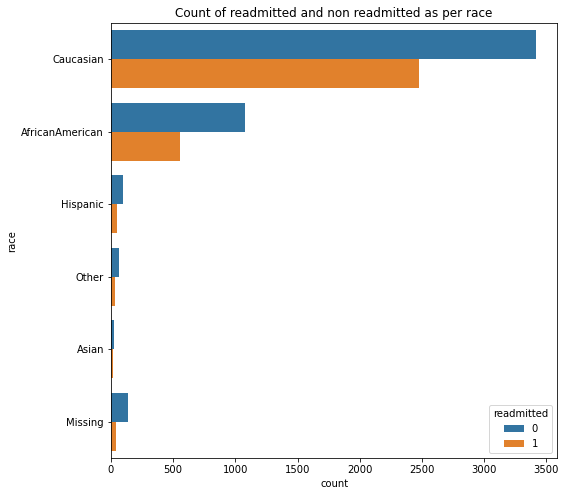

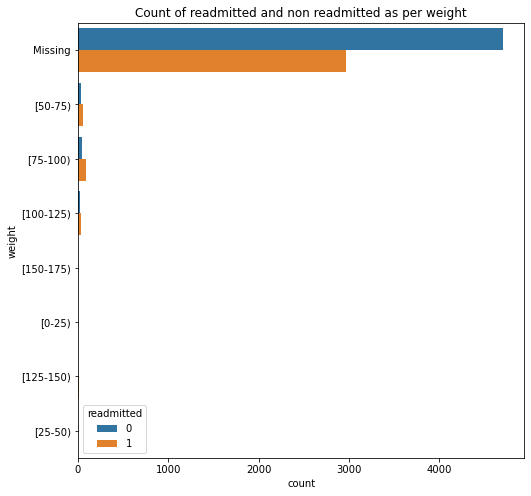

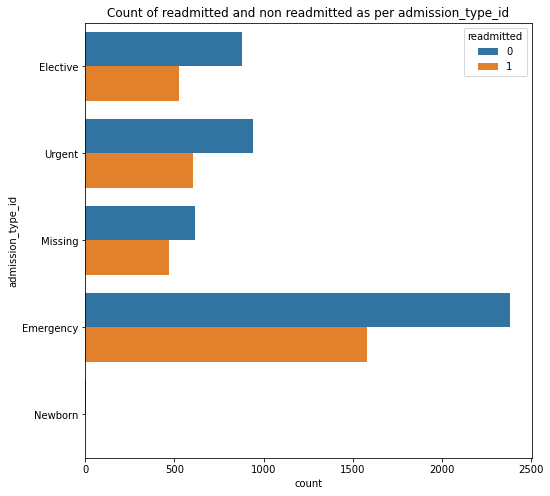

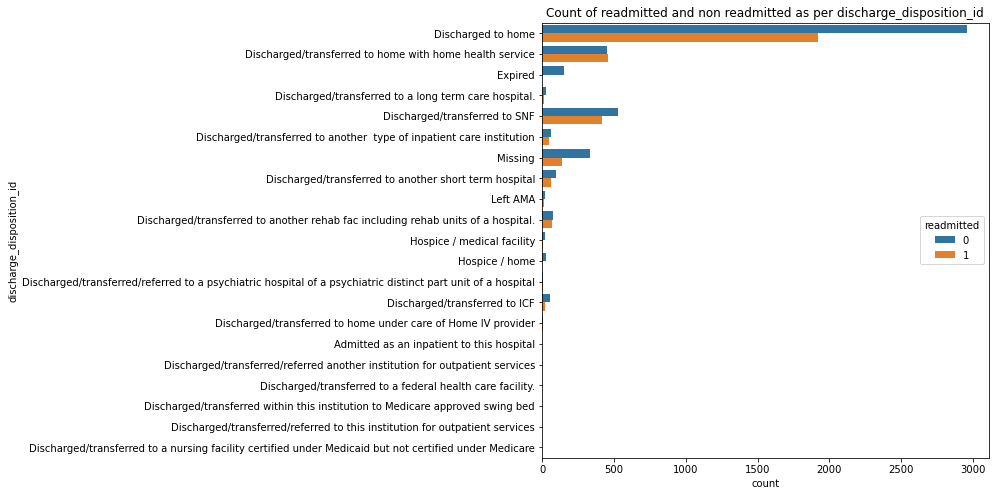

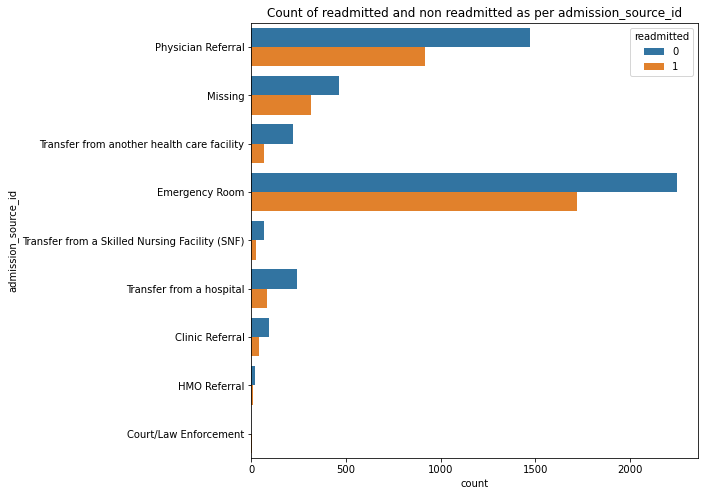

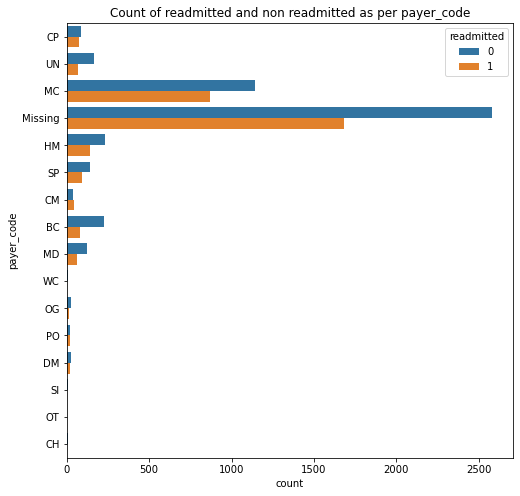

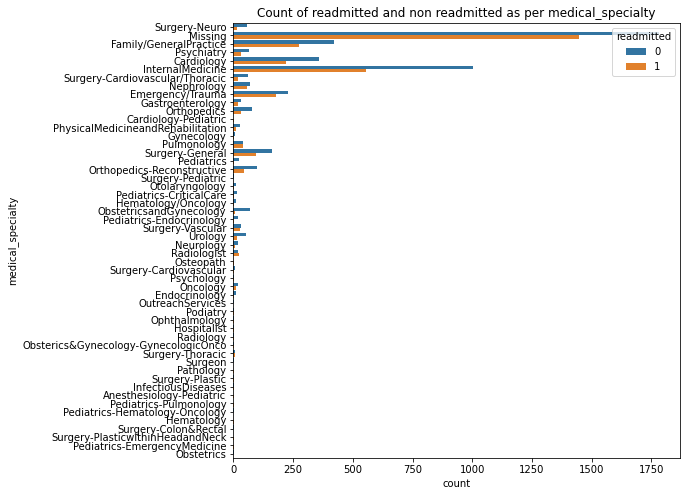

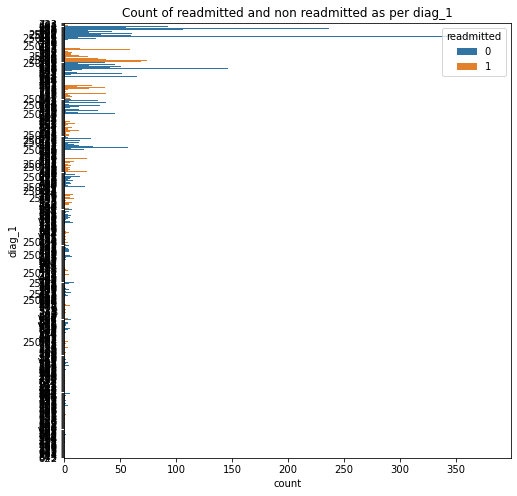

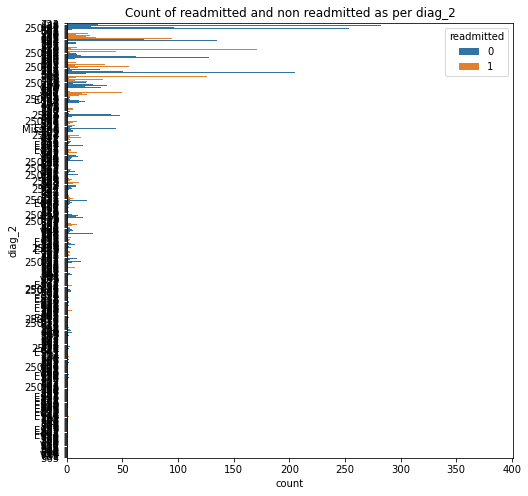

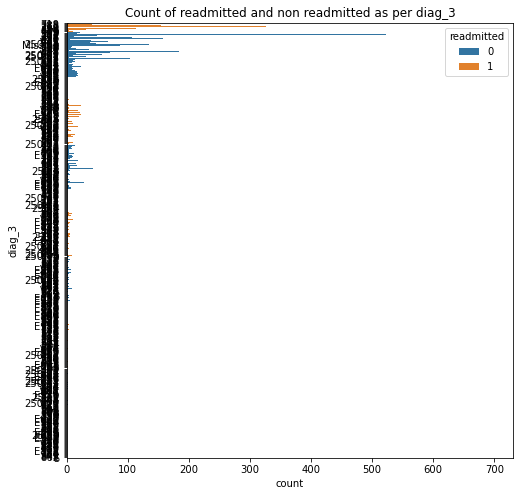

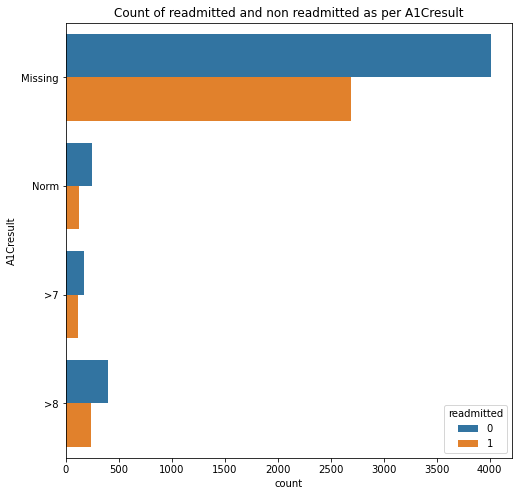

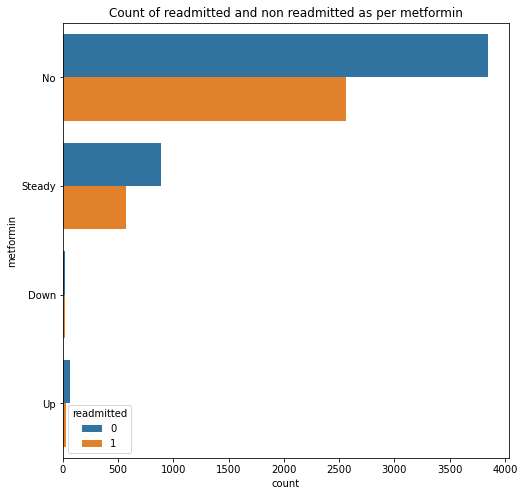

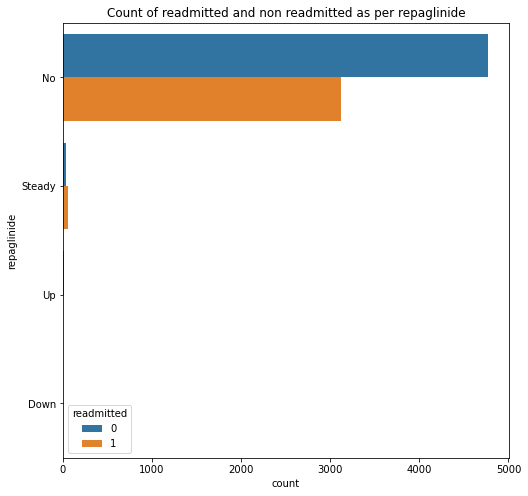

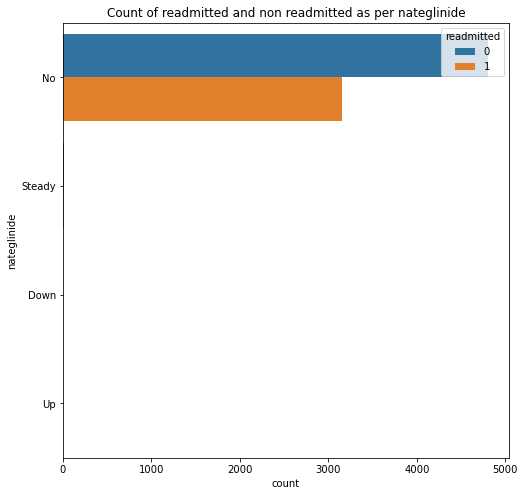

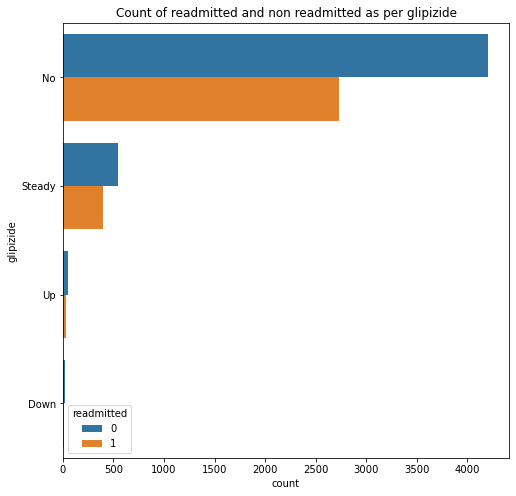

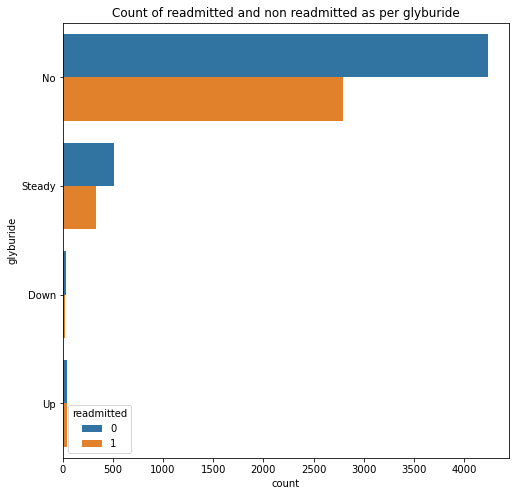

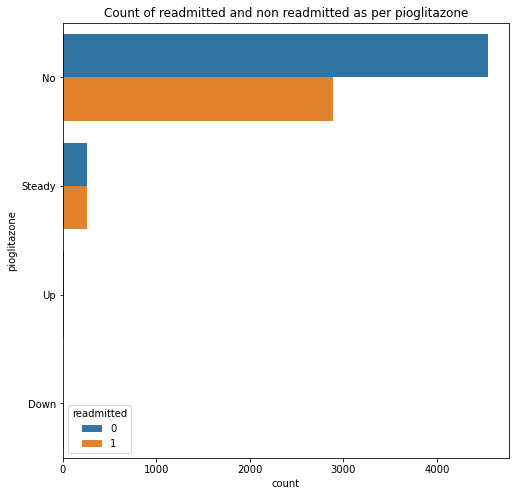

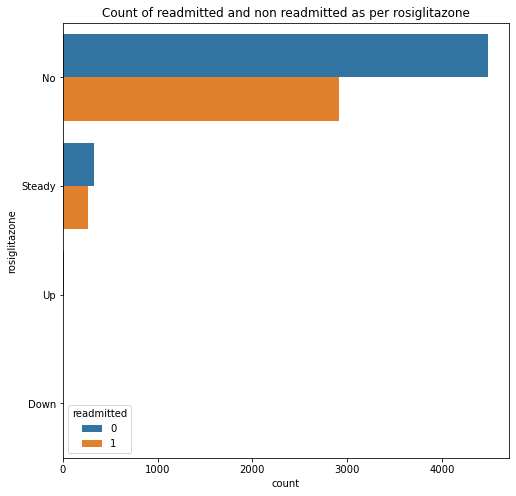

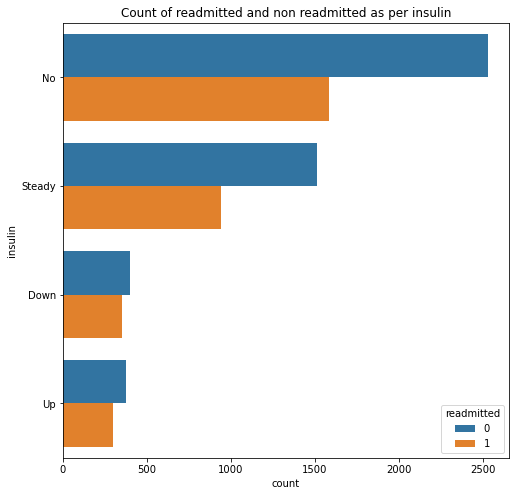

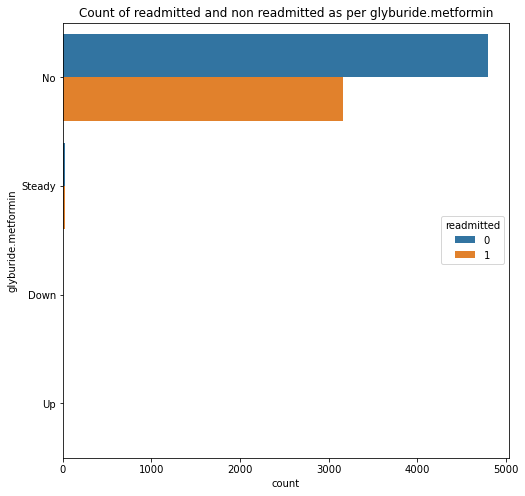

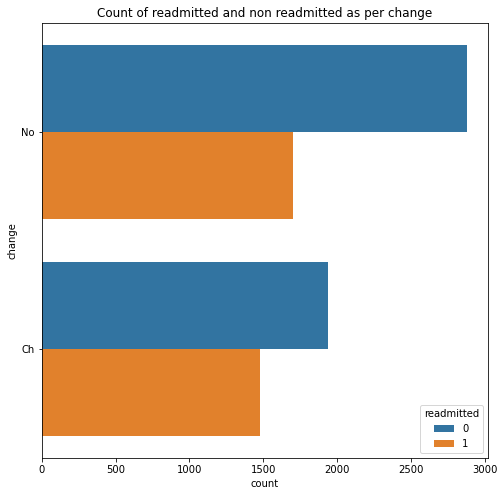

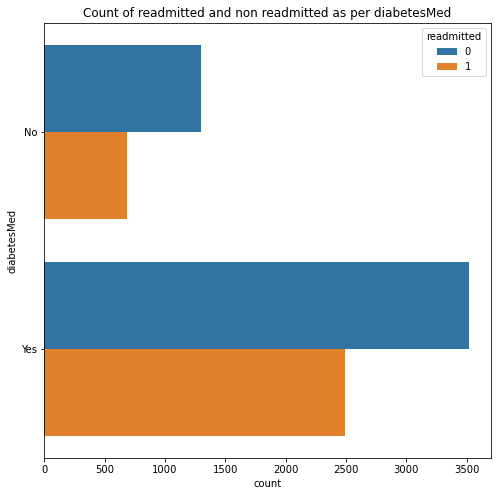

In [12]:
for col in categorical_cols:
    fig = plt.figure(figsize=(8,8))
    sns.countplot(y=df[col], hue = df['readmitted']).\
    set_title("Count of readmitted and non readmitted as per "+ col)

Plotting graphs for numerical features

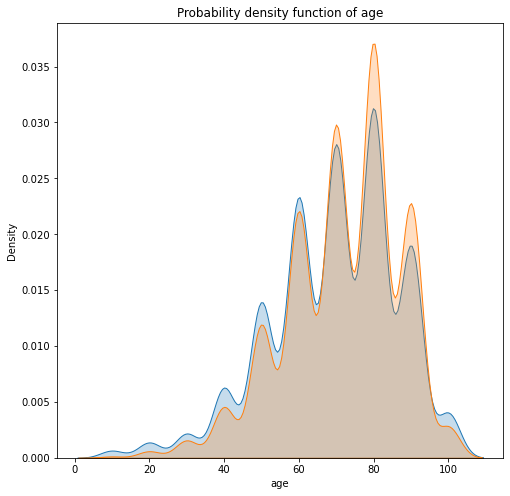

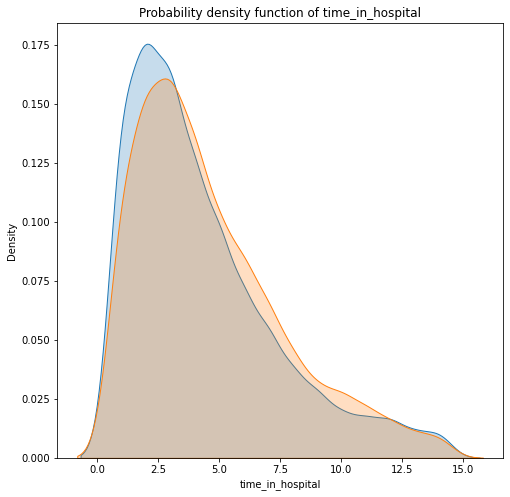

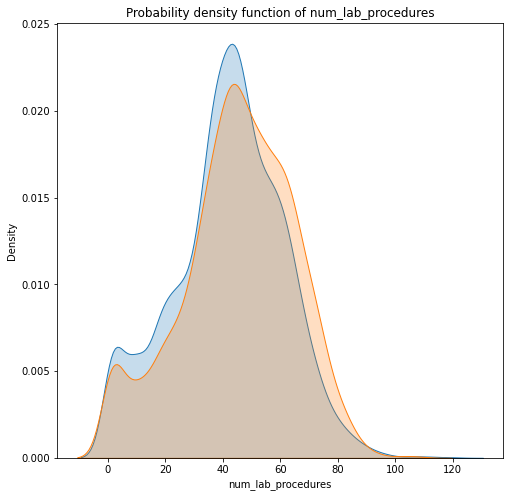

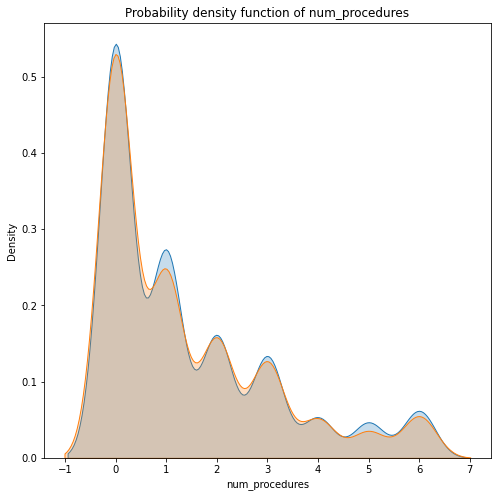

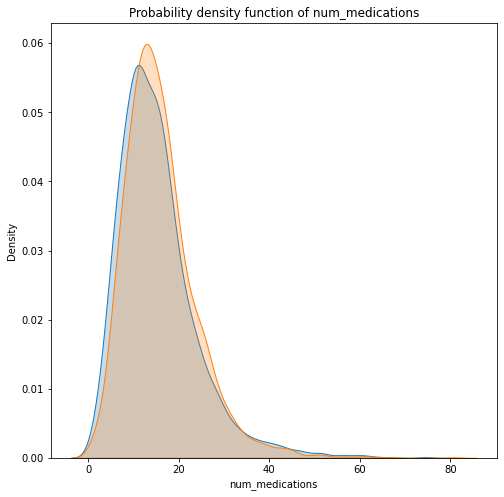

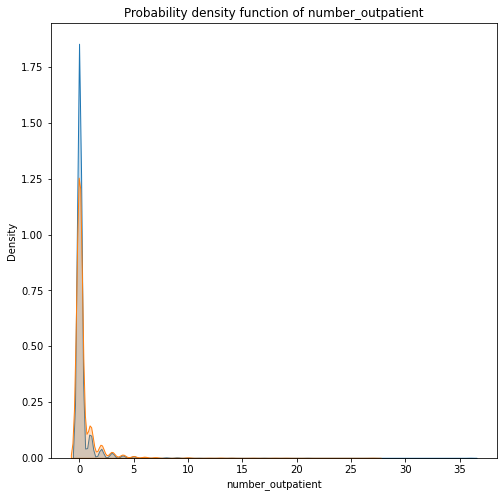

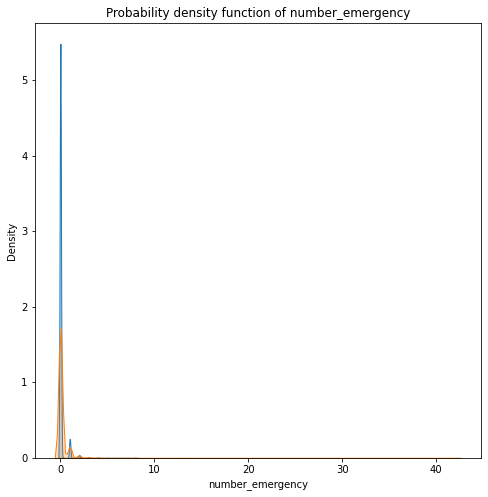

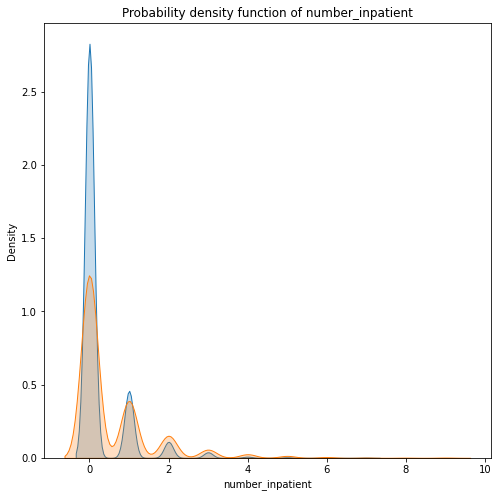

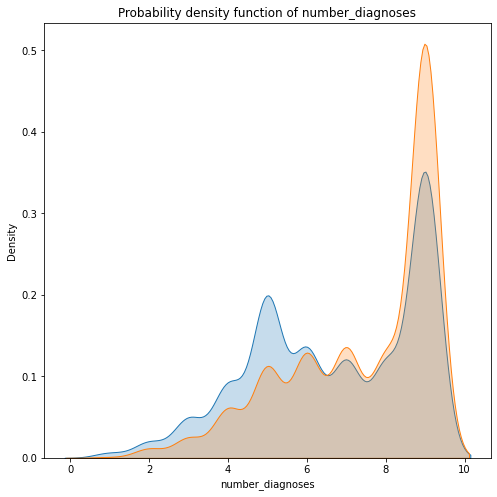

In [13]:
for col in numerical_col:
    fig = plt.figure(figsize=(8,8))
    ax = sns.kdeplot(df[df['readmitted']==0][col], shade = True)
    ax = sns.kdeplot(df[df['readmitted']==1][col], shade = True)
    plt.title("Probability density function of "+ col)

##### 1.8. Creating train-test split.

In [14]:
X = df.drop('readmitted', axis = 1)
Y = df['readmitted']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
X_train.reset_index(drop = True, inplace = True)
X_test.reset_index(drop = True, inplace = True)
Y_train.reset_index(drop = True, inplace = True)
Y_test.reset_index(drop = True, inplace = True)

### Pre-processed categorical data

##### 2.1. Creating/initializing different dataset for logistic regression model and random forest model as the feature encoding will be different for logistic model and random forest model.

In [15]:
X_train_lr, X_test_lr, X_train_rf, X_test_rf = pd.DataFrame(), pd.DataFrame(), pd.DataFrame(), pd.DataFrame()

##### 2.2. Splitting the categorical columns: columns with cardinality <= 10 and columns with cardinality > 10.
##### Logic: The features will be encoded differently for different algorithms and different cardinality.
##### Overview:
1) Ordinal encoding: For both logistic regression & random forest, when the feature is ordinal & has cardinality <= 10. </br>
2) One hot encoding: Only for logistic regression, when the feature has cardinality <= 10 & is not ordinal. </br>
3) Label encoding: Only for random forest, when the feature has cardinality <= 10 & is not ordinal. </br>
4) Frequency encoding: Only for random forest, when the feature has cardinality > 10. </br>
5) Weight of evidence: For both logistic regression & random forest and for all categorical features.

In [16]:
cat_cardinality10 = []
for col in categorical_cols:
    if X_train[col].nunique() <= 10: cat_cardinality10.append(col)

##### 2.3. Ordinal encoding (both for logistic regression & random forest)
##### For features with cardinality <= 10 
##### Logic: We will try to first select features that can be encoded by ordinal encoding and will then do the ordinal encoding for the selected features.

In [17]:
print(len(cat_cardinality10), len(categorical_cols))
cat_cardinality10

16 22


['race',
 'weight',
 'admission_type_id',
 'admission_source_id',
 'A1Cresult',
 'metformin',
 'repaglinide',
 'nateglinide',
 'glipizide',
 'glyburide',
 'pioglitazone',
 'rosiglitazone',
 'insulin',
 'glyburide.metformin',
 'change',
 'diabetesMed']

In [18]:
X_train_lr['weight'] = X_train['weight'].apply(lambda x: 1 if x != 'Missing' else 0)
X_test_lr['weight'] = X_test['weight'].apply(lambda x: 1 if x != 'Missing' else 0)
X_train_rf['weight'] = X_train['weight'].apply(lambda x: 1 if x != 'Missing' else 0)
X_test_rf['weight'] = X_test['weight'].apply(lambda x: 1 if x != 'Missing' else 0)

X_train_lr['change'] = X_train['change'].apply(lambda x: 1 if x == "Ch" else 0)
X_test_lr['change'] = X_test['change'].apply(lambda x: 1 if x == "Ch" else 0)
X_train_rf['change'] = X_train['change'].apply(lambda x: 1 if x == "Ch" else 0)
X_test_rf['change'] = X_test['change'].apply(lambda x: 1 if x == "Ch" else 0)

X_train_lr['diabetesMed'] = X_train['diabetesMed'].apply(lambda x: 1 if x == "Yes" else 0)
X_test_lr['diabetesMed'] = X_test['diabetesMed'].apply(lambda x: 1 if x == "Yes" else 0)
X_train_rf['diabetesMed'] = X_train['diabetesMed'].apply(lambda x: 1 if x == "Yes" else 0)
X_test_rf['diabetesMed'] = X_test['diabetesMed'].apply(lambda x: 1 if x == "Yes" else 0)

##### 2.4. One hot encoding (only for logistic regression)
##### For features with cardinality <= 10 and  are not ordinal.
##### Note: We would remove the encoding corresponding to the less frequent values for each column

In [19]:
# Remaining features 
one_hot_col = [col for col in cat_cardinality10 if col not in ['age','weight','change','diabetesMed']]
one_hot_col

['race',
 'admission_type_id',
 'admission_source_id',
 'A1Cresult',
 'metformin',
 'repaglinide',
 'nateglinide',
 'glipizide',
 'glyburide',
 'pioglitazone',
 'rosiglitazone',
 'insulin',
 'glyburide.metformin']

In [20]:
# find frequent elements
freq_col_ele = {}
for col in categorical_cols:
    Xtrain_col_ele_size = pd.DataFrame(df.groupby(col).size().reset_index().sort_values(by = 0, ascending = False))
    Xtrain_col_ele_size.rename(columns={0:'size'}, inplace = True)
    Xtrain_col_ele_size = Xtrain_col_ele_size[Xtrain_col_ele_size['size']> 30]
    freq_col_ele[col] = list(Xtrain_col_ele_size[col])
freq_col_ele['race']

['Caucasian', 'AfricanAmerican', 'Missing', 'Hispanic', 'Other', 'Asian']

In [21]:
for col in categorical_cols:
    X_train[col] = X_train[col].apply(lambda x: x if x in freq_col_ele[col] else "UnCommon")
    X_test[col] = X_test[col].apply(lambda x: x if x in freq_col_ele[col] else "UnCommon")

In [22]:
# One hot encoding
ohe = OneHotEncoder(handle_unknown='ignore')
ohe.fit(X_train[one_hot_col])
X_train_ohe = pd.DataFrame(ohe.transform(X_train[one_hot_col]).toarray())
X_test_ohe = pd.DataFrame(ohe.transform(X_test[one_hot_col]).toarray())
X_train_ohe.columns, X_test_ohe.columns = ohe.get_feature_names(), ohe.get_feature_names()

for col in X_train_ohe.columns:
    if "UnCommon" in col:
        X_train_ohe.drop(col, axis = 1, inplace = True)
        X_test_ohe.drop(col, axis = 1, inplace = True)
        
X_train_lr = X_train_lr.join(X_train_ohe)
X_test_lr = X_test_lr.join(X_test_ohe)

X_train_lr.shape

(6400, 50)

##### 2.5. Label encoding (only for random forest)
##### For features with cardinality <= 10 and  are not ordinal.
##### Note: We will only encode values for each feature that have significant sample size (i.e. 30 records)

In [23]:
label_col = one_hot_col

for col in label_col:
    X_train_col_freq = X_train[X_train[col].isin(freq_col_ele[col])]
    label_encoder = preprocessing.OrdinalEncoder(handle_unknown= 'use_encoded_value',unknown_value = len(freq_col_ele[col]))
    label_encoder.fit(X_train_col_freq[[col]])
    X_train_rf[col] = label_encoder.transform(X_train[[col]])
    X_test_rf[col] = label_encoder.transform(X_test[[col]])

##### 2.6. Frequency encoding for all categorical features (only for random forest)

In [24]:
len_X_tr = len(X_train)
for col in categorical_cols:
    freq_dict = X_train.groupby(col).size().to_dict()
    X_train_rf[col+'_freq'] = X_train[col].apply(lambda x: freq_dict[x]/len_X_tr)
    X_test_rf[col+'_freq'] = X_test[col].apply(lambda x: freq_dict[x]/len_X_tr if x in freq_dict else 0)
    
X_train_rf.shape

(6400, 38)

##### 2.7. Weight of Evidence (WoE) for all categorical features (for both logistic regression & random forest)

In [25]:
for col in categorical_cols:
    X_train_subset, target = pd.DataFrame(), 'readmitted'
    X_train_subset[col] = X_train[col] 
    X_train_subset['readmitted'] = Y_train
    X_train_subset = X_train_subset[X_train_subset[col].isin(freq_col_ele[col])]
    X_train_freq_WoE = (pd.crosstab(X_train_subset[col],X_train_subset[target],normalize='columns')
                        .assign(count=lambda dfx: dfx[1] + dfx[0])
                        .assign(WoE=lambda dfx: np.log(dfx[1] / dfx[0]))
                        .assign(IV=lambda dfx: np.sum(dfx['WoE']*(dfx[1]-dfx[0]))))
    print("\n-------------------\n")
    print(X_train_freq_WoE)


-------------------

readmitted              0         1     count       WoE       IV
race                                                            
AfricanAmerican  0.219139  0.178852  0.397991 -0.203146  0.02185
Asian            0.005187  0.006682  0.011869  0.253374  0.02185
Caucasian        0.716546  0.772406  1.488951  0.075068  0.02185
Hispanic         0.018154  0.015330  0.033484 -0.169041  0.02185
Missing          0.027749  0.014544  0.042293 -0.646018  0.02185
Other            0.013226  0.012186  0.025412 -0.081946  0.02185

-------------------

readmitted         0         1     count       WoE      IV
weight                                                    
Missing     0.976098  0.942132  1.918230 -0.035417  0.0323
[100-125)   0.004157  0.011891  0.016048  1.050973  0.0323
[50-75)     0.008833  0.017043  0.025877  0.657204  0.0323
[75-100)    0.010912  0.028934  0.039846  0.975155  0.0323

-------------------

readmitted                0         1     count       WoE   

readmitted         0         1     count       WoE       IV
glyburide                                                  
Down        0.006224  0.007075  0.013300  0.128211  0.00051
No          0.879668  0.875786  1.755454 -0.004423  0.00051
Steady      0.105031  0.106132  0.211163  0.010428  0.00051
Up          0.009077  0.011006  0.020083  0.192749  0.00051

-------------------

readmitted           0         1     count       WoE        IV
pioglitazone                                                  
No            0.946164  0.913732  1.859896 -0.034879  0.016424
Steady        0.053836  0.086268  0.140104  0.471517  0.016424

-------------------

readmitted            0         1     count       WoE        IV
rosiglitazone                                                  
No             0.931877  0.916831  1.848708 -0.016278  0.003248
Steady         0.068123  0.083169  0.151292  0.199565  0.003248

-------------------

readmitted         0         1     count       WoE        IV
insul

In [26]:
for col in categorical_cols:
    X_train_subset, target = pd.DataFrame(), 'readmitted'
    X_train_subset[col] = X_train[col] 
    X_train_subset['readmitted'] = Y_train
    X_train_subset = X_train_subset[X_train_subset[col].isin(freq_col_ele[col])]
    X_train_freq_WoE = (pd.crosstab(X_train_subset[col],X_train_subset[target],normalize='columns')
                        .assign(count=lambda dfx: dfx[1] + dfx[0])
                        .assign(WoE=lambda dfx: np.log(dfx[1] / dfx[0]))
                        .assign(IV=lambda dfx: np.sum(dfx['WoE']*(dfx[1]-dfx[0]))))
    if X_train_freq_WoE['IV'][0] > 0.02 and X_train_freq_WoE['IV'][0] <= 0.5: 
        dict_woe = dict(zip(X_train_freq_WoE.index,X_train_freq_WoE.WoE))
        X_train_lr[col+'_woe'] = X_train[col].apply(lambda x: dict_woe[x] if x in dict_woe else np.log(0.2))
        X_test_lr[col+'_woe'] = X_test[col].apply(lambda x: dict_woe[x] if x in dict_woe else np.log(0.2))
        X_train_rf[col+'_woe'] = X_train[col].apply(lambda x: dict_woe[x] if x in dict_woe else np.log(0.2))
        X_test_rf[col+'_woe'] = X_test[col].apply(lambda x: dict_woe[x] if x in dict_woe else np.log(0.2))
        
print(X_train_lr.shape, X_test_lr.shape, X_train_rf.shape, X_test_rf.shape)

(6400, 58) (1600, 58) (6400, 46) (1600, 46)


##### 2.8. Feature selection for categorical encoded features (for logistic regression)

In [27]:
def select_features(X_train, y_train, X_test, score_fn):
    fs = SelectKBest(score_func=score_fn, k='all')
    fs.fit(X_train, y_train)
    X_train_fs = fs.transform(X_train)
    X_test_fs = fs.transform(X_test)
    return fs.scores_

In [28]:
woe_cols, fs_cols = [], []
for col in X_train_lr.columns:
    if '_woe' in col: woe_cols.append(col)
    else: fs_cols.append(col)
        
scores = select_features(X_train_lr[fs_cols], Y_train, X_test_lr[fs_cols], chi2)
scores_df = pd.DataFrame({'Feature':fs_cols,'Scores':scores})
cols_lr = list(scores_df[scores_df['Scores']>0.5]['Feature']) + woe_cols
X_train_lr, X_test_lr = X_train_lr[cols_lr], X_test_lr[cols_lr]
print(X_train_lr.shape, X_test_lr.shape)

(6400, 37) (1600, 37)


##### 2.9. Feature selection for categorical encoded features (for random forest)

In [29]:
woe_cols, fs_cols = [], []
for col in X_train_rf.columns:
    if '_woe' in col: woe_cols.append(col)
    else: fs_cols.append(col)
        
scores = select_features(X_train_rf[fs_cols], Y_train, X_test_rf[fs_cols], mutual_info_classif)
scores_df = pd.DataFrame({'Feature':fs_cols,'Scores':scores})
#scores_df.sort_values(by='Scores', ascending = False)
cols_rf = list(scores_df[scores_df['Scores']>0]['Feature']) + woe_cols
X_train_rf, X_test_rf = X_train_rf[cols_rf], X_test_rf[cols_rf]
print(X_train_rf.shape, X_test_rf.shape)

(6400, 31) (1600, 31)


### Pre-processed numerical data

In [30]:
numerical_col

['age',
 'time_in_hospital',
 'num_lab_procedures',
 'num_procedures',
 'num_medications',
 'number_outpatient',
 'number_emergency',
 'number_inpatient',
 'number_diagnoses']

In [31]:
for col in numerical_col:
    if col not in ['readmitted','diag_1','diag_2','diag_3','diag_1_desc','diag_2_desc','diag_3_desc']:
        df_col_gr_size = pd.DataFrame(df.groupby(col).size().reset_index().sort_values(by = col, ascending = True))
        df_col_gr_size.rename(columns={0:'size'}, inplace = True)
        df_col_gr_class = pd.DataFrame(df.groupby(col)['readmitted'].sum().reset_index())
        df_col_merged = pd.merge(df_col_gr_size, df_col_gr_class, how = 'left',on = col)
        df_col_merged['percent_admitted'] = df_col_merged.apply(lambda x: x['readmitted']*100/x['size'], axis = 1)
#         df_col_merged.to_csv('num_cols_analysis.csv', mode = 'a')

##### 3.1. Creating/initializing different numerical dataset for logistic regression model and random forest model as the feature encoding will be different for logistic model and random forest model.

In [32]:
X_train_num_lr, X_test_num_lr, X_train_num_rf, X_test_num_rf = pd.DataFrame(), pd.DataFrame(), pd.DataFrame(), pd.DataFrame()

##### 3.2. Plotting Box plot for each numerical feature

<AxesSubplot:>

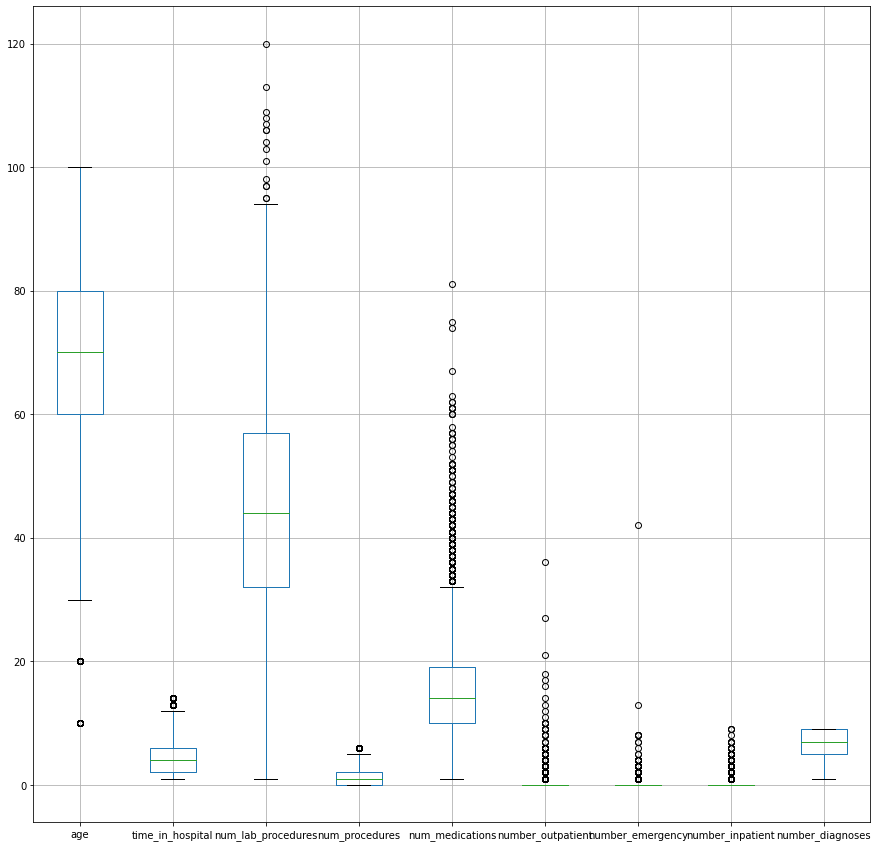

In [33]:
X_train.boxplot(column=numerical_col, figsize = (15,15))

##### 3.3. Directly using numerical features (both for logistic regression & random forest).
##### Logic: Features are selected based on the below criteria:
1) The features that have significant sample size for every value can be used directly. </br>
2) The features that are showing a general increasing or decreasing trend for probability of "readmission" can be directly consumed by logistic regression. </br> 
3) The features that have less number of distinct values which will in turn in less splits in decision trees.  

In [34]:
for col in ['age', 'time_in_hospital', 'num_procedures', 'number_diagnoses']:
    X_train_num_lr[col] = X_train[col]
    X_test_num_lr[col] = X_test[col]
    X_train_num_rf[col] = X_train[col]
    X_test_num_rf[col] = X_test[col]

##### 3.4. Bucketing or grouping of values in the features in monotonic way (both for logistic regression & random forest).
##### Logic: Bucketing of the groups in monotonic way for 3 main reasons: 
1) to reduce outliers </br>
2) to create a general increasing or decreasing trend for probability of "readmission" for better performance of logistic regression model (as logistic regression is a generalized linear model). </br>
3) to reduce the possible distinct values for the features for reducing the splits in decsion trees and hence reducing overfitting

In [35]:
def num_lab_procedures_fn(x):
    x = int(x/10) + 1
    if x > 9: x = 9
    return x

X_train_num_lr['num_lab_procedures'] = X_train['num_lab_procedures'].apply(lambda x: num_lab_procedures_fn(x))
X_test_num_lr['num_lab_procedures'] = X_test['num_lab_procedures'].apply(lambda x: num_lab_procedures_fn(x))
X_train_num_rf['num_lab_procedures'] = X_train['num_lab_procedures'].apply(lambda x: num_lab_procedures_fn(x))
X_test_num_rf['num_lab_procedures'] = X_test['num_lab_procedures'].apply(lambda x: num_lab_procedures_fn(x))

In [36]:
for col in ['number_outpatient','number_emergency','number_inpatient']:
    X_train_num_lr[col] = X_train[col].apply(lambda x: 2 if x>=2 else x)
    X_test_num_lr[col] = X_test[col].apply(lambda x: 2 if x>=2 else x)
    X_train_num_rf[col] = X_train[col].apply(lambda x: 2 if x>=2 else x)
    X_test_num_rf[col] = X_test[col].apply(lambda x: 2 if x>=2 else x)

##### 3.5. Bucketing or grouping of values in the features in non monotonic way (only for logistic regression).
##### Logic: Since logistic regression is a generalized linear model, we encode the feature in such a way to create general increasing or decreasing trend for probability of "readmission" for better performance.

In [37]:
def num_medications_fn(x):
    if x>= 41: r = 1
    elif x >= 1 and x <= 10: r = 2
    elif x >= 31 and x <= 40: r = 3
    elif x >= 11 and x <= 20: r = 4
    elif x >= 21 and x <= 30: r = 5
    return r

X_train_num_lr['num_medications'] = X_train['num_medications'].apply(lambda x: num_medications_fn(x))
X_test_num_lr['num_medications'] = X_test['num_medications'].apply(lambda x: num_medications_fn(x))

##### 3.6. Bucketing or grouping of features left (only for random forest)
##### Logic: Bucketing to remove outliers and to reduce the possible distinct values for the features for reducing the splits in decsion trees and hence reducing overfitting

In [38]:
X_train_num_rf['num_medications'] = X_train['num_medications'].apply(lambda x: 5 if int(x/10)+1 > 5 else int(x/10)+1)
X_test_num_rf['num_medications'] = X_test['num_medications'].apply(lambda x: 5 if int(x/10)+1 > 5 else int(x/10)+1)

##### 3.7. Scaling features (only for logistic regression)

In [39]:
scaler = StandardScaler()
X_train_num_sc = pd.DataFrame(scaler.fit_transform(X_train_num_lr))
X_test_num_sc = pd.DataFrame(scaler.transform(X_test_num_lr))
X_train_num_sc.columns, X_test_num_sc.columns = X_train_num_lr.columns, X_test_num_lr.columns

<AxesSubplot:>

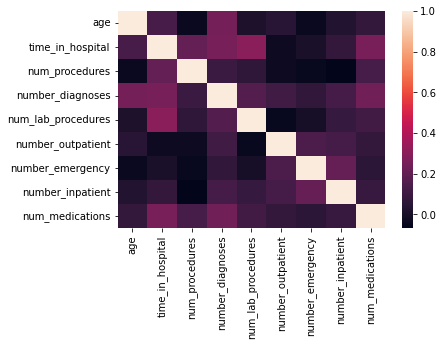

In [40]:
corr = X_train_num_sc.corr()
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns)

In [41]:
corr

,age,time_in_hospital,num_procedures,number_diagnoses,num_lab_procedures,number_outpatient,number_emergency,number_inpatient,num_medications
age,1.000000,0.135472,-0.035387,0.252323,0.011259,0.047896,-0.035779,0.031137,0.074944
time_in_hospital,0.135472,1.000000,0.209001,0.255790,0.301644,-0.034264,0.006001,0.075290,0.260772
num_procedures,-0.035387,0.209001,1.000000,0.096628,0.063507,-0.032252,-0.047586,-0.068628,0.128955
number_diagnoses,0.252323,0.255790,0.096628,1.000000,0.163438,0.114554,0.070952,0.127118,0.236376
num_lab_procedures,0.011259,0.301644,0.063507,0.163438,1.000000,-0.043629,-0.003104,0.082738,0.119106
number_outpatient,0.047896,-0.034264,-0.032252,0.114554,-0.043629,1.000000,0.144509,0.125608,0.077045
number_emergency,-0.035779,0.006001,-0.047586,0.070952,-0.003104,0.144509,1.000000,0.213623,0.055529
number_inpatient,0.031137,0.075290,-0.068628,0.127118,0.082738,0.125608,0.213623,1.000000,0.086844
num_medications,0.074944,0.260772,0.128955,0.236376,0.119106,0.077045,0.055529,0.086844,1.000000


No two features have more than 0.6 correlation value and hence we will be using all the numerical fetaures.

##### 3.8. Combining categorical & numeric features (for both logistic regression & random forest)

In [42]:
X_train_lr = X_train_lr.join(X_train_num_sc)
X_test_lr = X_test_lr.join(X_test_num_sc)
print(X_train_lr.shape, X_test_lr.shape)

X_train_rf = X_train_rf.join(X_train_num_rf)
X_test_rf = X_test_rf.join(X_test_num_rf)
print(X_train_rf.shape, X_test_rf.shape)

(6400, 46) (1600, 46)
(6400, 40) (1600, 40)


##### 3.9. Building logistic regression by hyperparameter tuning using cross validation

In [43]:
# define model
lr = LogisticRegression()

# define search space
grid = {'penalty':['none', 'l1', 'l2', 'elasticnet'], 'C':[1e-4, 1e-3, 1e-2, 1e-1, 1, 10, 100]}

# define search
search = GridSearchCV(estimator = lr, param_grid = grid, scoring='roc_auc', n_jobs=-1, cv=5)

# execute search
result = search.fit(X_train_lr, Y_train)

# summarize result
print('Best Cross Validation Score: ', result.best_score_)
print('Best Hyperparameters: ', result.best_params_)
lr_best_params = result.best_params_

Best Cross Validation Score:  0.6738766855479479
Best Hyperparameters:  {'C': 0.1, 'penalty': 'l2'}


##### 3.10. Building random forest by hyperparameter tuning using cross validation

In [44]:
# define model
rf = RandomForestClassifier()

# define search space
grid = {'n_estimators':[400, 500, 600, 700], 'min_samples_split':[50, 60, 70, 80, 90, 100],\
       'class_weight':['balanced']}

# define search
search = GridSearchCV(estimator = rf, param_grid = grid, scoring='roc_auc', n_jobs=-1, cv=5)

# execute search
result = search.fit(X_train_rf, Y_train)

# summarize result
print('Best Cross Validation Score: ', result.best_score_)
print('Best Hyperparameters: ', result.best_params_)
rf_best_params = result.best_params_

Best Cross Validation Score:  0.6951016740647173
Best Hyperparameters:  {'class_weight': 'balanced', 'min_samples_split': 60, 'n_estimators': 700}


### Model to make predictions using text data using tf-idf

##### 4.1. Creating a combined column for diagnostic description

In [45]:
X_train['diag_desc'] = X_train.apply(lambda x: x['diag_1_desc']+" "+ x['diag_2_desc']+ " "+x['diag_3_desc'], axis = 1)
X_test['diag_desc'] = X_test.apply(lambda x: x['diag_1_desc']+" " + x['diag_2_desc']+" " + x['diag_3_desc'], axis = 1)

for col in ['diag_1_desc', 'diag_2_desc', 'diag_3_desc', 'diag_desc']:
    X_train[col] = X_train[col].apply(lambda x: "".join(re.findall("[a-z ]", x.lower())))
    X_test[col] = X_test[col].apply(lambda x: "".join(re.findall("[a-z ]", x.lower())))

##### 4.2. Choosing whether to use 3 text features seperately or to take combined description

In [46]:
vectorizer = TfidfVectorizer(min_df = 20)
X = vectorizer.fit_transform(X_train['diag_1_desc'])
print("Diag 1 description tf-idf vectorizer shape: ", X.shape)

vectorizer = TfidfVectorizer(min_df = 20)
X = vectorizer.fit_transform(X_train['diag_2_desc'])
print("Diag 2 description tf-idf vectorizer shape: ", X.shape)

vectorizer = TfidfVectorizer(min_df = 20)
X = vectorizer.fit_transform(X_train['diag_3_desc'])
print("Diag 3 description tf-idf vectorizer shape: ", X.shape)

vectorizer = TfidfVectorizer(min_df = 20)
X = vectorizer.fit_transform(X_train['diag_desc'])
print("Diag 4 description tf-idf vectorizer shape: ", X.shape)

Diag 1 description tf-idf vectorizer shape:  (6400, 191)
Diag 2 description tf-idf vectorizer shape:  (6400, 167)
Diag 3 description tf-idf vectorizer shape:  (6400, 164)
Diag 4 description tf-idf vectorizer shape:  (6400, 369)


##### We will choose to create a model on the combined diagnostic description feature for the following reasons:
1) Creating 3 different models for each description will increase the complexity of stacked model and might also cause overfitting. </br>
2) Medical terminologies are shared across these 3 diagnostic description and hence combining them will be useful. </br>
3) Creating one data by combining the td-idf vectorizers for all 3 description columns will lead to curse of dimensionality.

##### 4.3. Logistic regression model on the tf-idf features obtained by the combined diagnostic description

In [47]:
vectorizer = TfidfVectorizer(min_df = 20, ngram_range = (1,2))
X_train_tfidf = vectorizer.fit_transform(X_train['diag_desc'])
X_test_tfidf = vectorizer.transform(X_test['diag_desc'])
X_train_tfidf = pd.DataFrame(X_train_tfidf.toarray())
X_test_tfidf = pd.DataFrame(X_test_tfidf.toarray())
X_train_tfidf.columns, X_test_tfidf.columns = vectorizer.get_feature_names(), vectorizer.get_feature_names()

scores = select_features(X_train_tfidf, Y_train, X_test_tfidf, chi2)
scores_df = pd.DataFrame({'Feature':X_train_tfidf.columns,'Scores':scores})
cols_lr = list(scores_df[scores_df['Scores']>0.5]['Feature'])
X_train_tfidf, X_test_tfidf = X_train_tfidf[cols_lr], X_test_tfidf[cols_lr]

# Standardizing the data
scaler = StandardScaler()
X_train_tfidf = scaler.fit_transform(X_train_tfidf)
X_test_tfidf = scaler.transform(X_test_tfidf)
print(X_train_tfidf.shape, X_test_tfidf.shape)

(6400, 327) (1600, 327)


In [48]:
# define model
lr = LogisticRegression()
# define search space
grid = {'penalty':['none', 'l1', 'l2', 'elasticnet'], 'C':[1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1, 10, 100]}
# define search
search = GridSearchCV(estimator = lr, param_grid = grid, scoring='roc_auc', n_jobs=-1, cv=5)
# execute search
result = search.fit(X_train_tfidf, Y_train)
# summarize result
print('Best Cross Validation Score: ', result.best_score_)
print('Best Hyperparameters: ', result.best_params_)
lr_tfidf_best_params = result.best_params_

Best Cross Validation Score:  0.6117062805699847
Best Hyperparameters:  {'C': 0.001, 'penalty': 'l2'}


### Use model stacking to incorporate tf-idf predictions for all 3 text fields (so 3 models unless you elect to concatenate the text fields into 1 - need to justify if so) in downstream algorithm the uses non-text features

##### The below stacking model will be trained.
##### Model 1: Logistic regression model on categorical + numerical encoded data
##### Model 2: Random forest model on categorical + numerical encoded data
##### Model 3: Logistic regression model on text encoded data
##### Note: For traning of stacking model, we will use the predicted probabilities from cross validation and not the original/given data.

##### 5.1. Preparing data for stacking model (logistic regression model will be used for stacking)

In [49]:
lr = LogisticRegression(C = lr_best_params['C'], penalty = lr_best_params['penalty'])
lr_predict_proba_train = cross_val_predict(lr, X_train_lr, Y_train, cv=5, method='predict_proba')[:,1]
lr.fit(X_train_lr, Y_train)
lr_predict_proba_train = pd.DataFrame({'lr_proba':lr_predict_proba_train})
lr_predict_proba_test = pd.DataFrame({'lr_proba':lr.predict_proba(X_test_lr)[:,1]}) 

rf = RandomForestClassifier(min_samples_split = rf_best_params['min_samples_split'], n_estimators = \
                            rf_best_params['n_estimators'], class_weight = rf_best_params['class_weight'] )
rf_predict_proba_train = cross_val_predict(rf, X_train_rf, Y_train, cv=5, method='predict_proba')[:,1]
rf.fit(X_train_rf, Y_train)
rf_predict_proba_train = pd.DataFrame({'rf_proba':rf_predict_proba_train})
rf_predict_proba_test = pd.DataFrame({'rf_proba':rf.predict_proba(X_test_rf)[:,1]})

lr_tfidf = LogisticRegression(C = lr_tfidf_best_params['C'], penalty = lr_tfidf_best_params['penalty'])
lr_predict_proba_train_tfidf = cross_val_predict(lr_tfidf, X_train_tfidf, Y_train, cv=5, method='predict_proba')[:,1]
lr_tfidf.fit(X_train_tfidf, Y_train)
lr_predict_proba_train_tfidf = pd.DataFrame({'lr_tfidf_proba':lr_predict_proba_train_tfidf})
lr_predict_proba_test_tfidf = pd.DataFrame({'lr_tfidf_proba':lr_tfidf.predict_proba(X_test_tfidf)[:,1]}) 

stacking_train = lr_predict_proba_train.join(rf_predict_proba_train)
stacking_train = stacking_train.join(lr_predict_proba_train_tfidf)
stacking_test = lr_predict_proba_test.join(rf_predict_proba_test)
stacking_test = stacking_test.join(lr_predict_proba_test_tfidf)

##### 5.2. Logistic regression model as stacking model

In [50]:
stacking_clf = LogisticRegression()
# define search space
grid = {'penalty':['none', 'l1', 'l2', 'elasticnet'], 'C':[1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1, 10, 100]}
# define search
search = GridSearchCV(estimator = stacking_clf, param_grid = grid, scoring='roc_auc', n_jobs=-1, cv=5)
# execute search
result = search.fit(stacking_train, Y_train)
# summarize result
print('Best  Cross Validation Score: ', result.best_score_)
print('Best Hyperparameters: ', result.best_params_)
stacking_best_params = result.best_params_

stacking_clf = LogisticRegression(C = stacking_best_params['C'], penalty = stacking_best_params['penalty'])
stacking_clf.fit(stacking_train, Y_train)

Best  Cross Validation Score:  0.6960906214717164
Best Hyperparameters:  {'C': 1e-05, 'penalty': 'none'}


LogisticRegression(C=1e-05, penalty='none')

##### 5.3. Evaluation of stacked model

In [51]:
X_test['stacking_proba'] = stacking_clf.predict_proba(stacking_test)[:,1]
print("AUC score using stacked model: ", roc_auc_score(Y_test, X_test['stacking_proba']))
X_test['stacking_proba'] = X_test.apply(lambda x: 0 if x['discharge_disposition_id'] == 'Expired' \
                                             else x['stacking_proba'],axis = 1)
print("AUC score using stacked model after post precessing: ", roc_auc_score(Y_test, X_test['stacking_proba']))

AUC score using stacked model:  0.7129484491643316
AUC score using stacked model after post precessing:  0.7210161255559693


### 6.Experimentation for multiple modeling algorithms

##### 6.1. Combing tf-idf feature with catgeorical & numeric feature
##### Model 1: Logistic regression model on categorical + numerical encoded data
##### Model 2: Random forest model on categorical + numerical encoded data
##### Model 3: Logistic regression model on categorical + numerical + text encoded data
##### Stacked model to combine all the three above models
##### Note: For traning of stacking model, we will use the predicted probabilities from cross validation and not the original/given data.
##### Logic: Since model only on tf-idf is not giving good score, combining tf-idf with other categorical & numerical features to increase score.

In [52]:
X_train_tfidf = pd.DataFrame(X_train_tfidf).join(X_train_lr)
X_test_tfidf = pd.DataFrame(X_test_tfidf).join(X_test_lr)

# define model
lr = LogisticRegression()
# define search space
grid = {'penalty':['none', 'l1', 'l2', 'elasticnet'], 'C':[1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1, 10, 100]}
# define search
search = GridSearchCV(estimator = lr, param_grid = grid, scoring='roc_auc', n_jobs=-1, cv=5)
# execute search
result = search.fit(X_train_tfidf, Y_train)
# summarize result
print('Best Cross Validation Score: ', result.best_score_)
print('Best Hyperparameters: ', result.best_params_)
lr_tfidf_best_params = result.best_params_

Best Cross Validation Score:  0.672812463977263
Best Hyperparameters:  {'C': 0.01, 'penalty': 'l2'}


In [53]:
lr = LogisticRegression(C = lr_best_params['C'], penalty = lr_best_params['penalty'])
lr_predict_proba_train = cross_val_predict(lr, X_train_lr, Y_train, cv=5, method='predict_proba')[:,1]
lr.fit(X_train_lr, Y_train)
lr_predict_proba_train = pd.DataFrame({'lr_proba':lr_predict_proba_train})
lr_predict_proba_test = pd.DataFrame({'lr_proba':lr.predict_proba(X_test_lr)[:,1]}) 

rf = RandomForestClassifier(min_samples_split = rf_best_params['min_samples_split'], n_estimators = \
                            rf_best_params['n_estimators'], class_weight = rf_best_params['class_weight'] )
rf_predict_proba_train = cross_val_predict(rf, X_train_rf, Y_train, cv=5, method='predict_proba')[:,1]
rf.fit(X_train_rf, Y_train)
rf_predict_proba_train = pd.DataFrame({'rf_proba':rf_predict_proba_train})
rf_predict_proba_test = pd.DataFrame({'rf_proba':rf.predict_proba(X_test_rf)[:,1]})

lr_tfidf = LogisticRegression(C = lr_tfidf_best_params['C'], penalty = lr_tfidf_best_params['penalty'])
lr_predict_proba_train_tfidf = cross_val_predict(lr_tfidf, X_train_tfidf, Y_train, cv=5, method='predict_proba')[:,1]
lr_tfidf.fit(X_train_tfidf, Y_train)
lr_predict_proba_train_tfidf = pd.DataFrame({'lr_tfidf_proba':lr_predict_proba_train_tfidf})
lr_predict_proba_test_tfidf = pd.DataFrame({'lr_tfidf_proba':lr_tfidf.predict_proba(X_test_tfidf)[:,1]}) 

stacking_train = lr_predict_proba_train.join(rf_predict_proba_train)
stacking_train = stacking_train.join(lr_predict_proba_train_tfidf)
stacking_test = lr_predict_proba_test.join(rf_predict_proba_test)
stacking_test = stacking_test.join(lr_predict_proba_test_tfidf)

In [54]:
stacking_clf = LogisticRegression()
# define search space
grid = {'penalty':['none', 'l1', 'l2', 'elasticnet'], 'C':[1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1, 10, 100]}
# define search
search = GridSearchCV(estimator = stacking_clf, param_grid = grid, scoring='roc_auc', n_jobs=-1, cv=5)
# execute search
result = search.fit(stacking_train, Y_train)
# summarize result
print('Best Cross Validation Score: ', result.best_score_)
print('Best Hyperparameters: ', result.best_params_)
stacking_best_params = result.best_params_

stacking_clf = LogisticRegression(C = stacking_best_params['C'], penalty = stacking_best_params['penalty'])
stacking_clf.fit(stacking_train, Y_train)

Best Cross Validation Score:  0.697353990912069
Best Hyperparameters:  {'C': 10, 'penalty': 'l2'}


LogisticRegression(C=10)

In [55]:
X_test['stacking_proba'] = stacking_clf.predict_proba(stacking_test)[:,1]
print("AUC score using stacked model: ", roc_auc_score(Y_test, X_test['stacking_proba']))
X_test['stacking_proba'] = X_test.apply(lambda x: 0 if x['discharge_disposition_id'] == 'Expired' \
                                             else x['stacking_proba'],axis = 1)
print("AUC score using stacked model after post precessing: ", roc_auc_score(Y_test, X_test['stacking_proba']))

AUC score using stacked model:  0.714382049624129
AUC score using stacked model after post precessing:  0.7223305314445075


##### 6.2. Combing tf-idf feature with catgeorical & numeric feature
##### Model 1: Logistic regression model on categorical + numerical encoded data
##### Model 2: Random forest model on categorical + numerical encoded data
##### Model 3: Gradient boosting model on categorical + numerical encoded data
##### Model 4: Logistic regression model on categorical + numerical + text encoded data
##### Stacked model to combine all the three above models
##### Note: For traning of stacking model, we will use the predicted probabilities from cross validation and not the original/given data.
##### Logic: Till now, we were having linear generalized model and bagging model. Gradient boosting is a boosting algorithm, hence adding a different type of model might increase the score.

In [56]:
lr = LogisticRegression(C = lr_best_params['C'], penalty = lr_best_params['penalty'])
lr_predict_proba_train = cross_val_predict(lr, X_train_lr, Y_train, cv=5, method='predict_proba')[:,1]
lr.fit(X_train_lr, Y_train)
lr_predict_proba_train = pd.DataFrame({'lr_proba':lr_predict_proba_train})
lr_predict_proba_test = pd.DataFrame({'lr_proba':lr.predict_proba(X_test_lr)[:,1]}) 

rf = RandomForestClassifier(min_samples_split = rf_best_params['min_samples_split'], n_estimators = \
                            rf_best_params['n_estimators'], class_weight = rf_best_params['class_weight'] )
rf_predict_proba_train = cross_val_predict(rf, X_train_rf, Y_train, cv=5, method='predict_proba')[:,1]
rf.fit(X_train_rf, Y_train)
rf_predict_proba_train = pd.DataFrame({'rf_proba':rf_predict_proba_train})
rf_predict_proba_test = pd.DataFrame({'rf_proba':rf.predict_proba(X_test_rf)[:,1]})

gb = GradientBoostingClassifier()
gb_predict_proba_train = cross_val_predict(gb, X_train_rf, Y_train, cv=5, method='predict_proba')[:,1]
gb.fit(X_train_rf, Y_train)
gb_predict_proba_train = pd.DataFrame({'gb_proba':gb_predict_proba_train})
gb_predict_proba_test = pd.DataFrame({'gb_proba':gb.predict_proba(X_test_rf)[:,1]})


lr_tfidf = LogisticRegression(C = lr_tfidf_best_params['C'], penalty = lr_tfidf_best_params['penalty'])
lr_predict_proba_train_tfidf = cross_val_predict(lr_tfidf, X_train_tfidf, Y_train, cv=5, method='predict_proba')[:,1]
lr_tfidf.fit(X_train_tfidf, Y_train)
lr_predict_proba_train_tfidf = pd.DataFrame({'lr_tfidf_proba':lr_predict_proba_train_tfidf})
lr_predict_proba_test_tfidf = pd.DataFrame({'lr_tfidf_proba':lr_tfidf.predict_proba(X_test_tfidf)[:,1]}) 


stacking_train = lr_predict_proba_train.join(rf_predict_proba_train)
stacking_train = stacking_train.join(gb_predict_proba_train)
stacking_train = stacking_train.join(lr_predict_proba_train_tfidf)
stacking_test = lr_predict_proba_test.join(rf_predict_proba_test)
stacking_test = stacking_test.join(gb_predict_proba_test)
stacking_test = stacking_test.join(lr_predict_proba_test_tfidf)


stacking_clf = LogisticRegression()
# define search space
grid = {'penalty':['none', 'l1', 'l2', 'elasticnet'], 'C':[1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1, 10, 100]}
# define search
search = GridSearchCV(estimator = stacking_clf, param_grid = grid, scoring='roc_auc', n_jobs=-1, cv=5)
# execute search
result = search.fit(stacking_train, Y_train)
# summarize result
print('Best Cross Validation Score: ', result.best_score_)
print('Best Hyperparameters: ', result.best_params_)
stacking_best_params = result.best_params_

stacking_clf = LogisticRegression(C = stacking_best_params['C'], penalty = stacking_best_params['penalty'])
stacking_clf.fit(stacking_train, Y_train)
roc_auc_score(Y_test, stacking_clf.predict_proba(stacking_test)[:,1])

Best Cross Validation Score:  0.699029275333875
Best Hyperparameters:  {'C': 1, 'penalty': 'l2'}


0.715343770205929

In [57]:
X_test['stacking_proba'] = stacking_clf.predict_proba(stacking_test)[:,1]
print("AUC score using stacked model: ", roc_auc_score(Y_test, X_test['stacking_proba']))
X_test['stacking_proba'] = X_test.apply(lambda x: 0 if x['discharge_disposition_id'] == 'Expired' else x['stacking_proba'],\
                                        axis = 1)
print("AUC score using stacked model after post precessing: ", roc_auc_score(Y_test, X_test['stacking_proba']))

AUC score using stacked model:  0.715343770205929
AUC score using stacked model after post precessing:  0.7207369163548014


##### 6.3. Model: Neural Network Model
##### Logic: Using neural network model to learn more non-linear relationships

In [58]:
# define model
lr = MLPClassifier()

# define search space
grid = {'hidden_layer_sizes':[(10,5), (20, 10, 5)], 'alpha':[1e-4, 1e-3, 1e-2, 1e-1, 1, 10]}

# define search
search = GridSearchCV(estimator = lr, param_grid = grid, scoring='roc_auc', n_jobs=-1, cv=5)

# execute search
result = search.fit(X_train_lr, Y_train)

# summarize result
print('Best Cross Validation Score: ', result.best_score_)
print('Best Hyperparameters: ', result.best_params_)

Best Cross Validation Score:  0.6759357646043853
Best Hyperparameters:  {'alpha': 1, 'hidden_layer_sizes': (10, 5)}


Even by increasing the complexity of the model, there is not much increase in the model performance and infact the score is less than random forest model.

### Final model selection 

The below models were tried: </br>
##### 1) Logistic regression: 
Strengths: The model is simple and took less time to execute. Interpreting the features contributing to the "readmission" is easy to interpret i.e. higher coefficient means higher contribution of the feature to "readmission" class. </br>
Weakness: Since, the model is a linear generalized model, it did not give the best performance score. </br>

##### 2) Random forest:
Strengths: The model captured non-linear relationships and provided best performance score. </br>
Weakness: Takes more time to train compared to logistic regression model and difficult to interpret important features as the model is complex.

##### 3) Gradient Boosting:
Strengths: The model generally gives better performance as it understands training data well & reduces bias. </br>
Weakness: The model couldn't be trained using cross validation on local system due to memory & time issues. Even though the model gave good score on training data using model default parameters, it couldn't generalize well to test data resulting in lower score on test data. The reason could be that the model tends to overfit on the training data. However, using more data could increase model performance score.

##### 4) Neural Network:
Strengths: The model generally gives better performance as it understands training data well & reduces bias. </br>
Weakness: The model couldn't perform well on our training data. The reason for this could be less amount of data. It also takes lot of time to train.

##### Final Model selection:
We would be using only logistic regression and random forest as our final model since they are generalizing well to our test dataset. The below is the final model selection:
##### Model 1: Logistic regression model on categorical + numerical encoded data
##### Model 2: Random forest model on categorical + numerical encoded data
##### Model 3: Logistic regression model on categorical + numerical + text encoded data
##### Stacked model to combine all the three above models

## Model Performance 

##### 1. Data loading & general data preparation

In [59]:
train = pd.read_csv('8k_diabetes.csv')
test = pd.read_csv('2k_diabetes_scoring.csv')

In [60]:
train['readmitted'] = train['readmitted'].apply(lambda x: 1 if x == True else 0)

# Imputing missing values
for col in test.columns:
    if test[col].dtype == 'object':
        train[col].fillna('Missing', inplace = True)
        test[col].fillna('Missing', inplace = True)
        train[col] = train[col].apply(lambda x: "Missing" if x in ['?','Not Available','Not Mapped', 'None', ''] else x)
        test[col] = test[col].apply(lambda x: "Missing" if x in ['?','Not Available','Not Mapped', 'None', ''] else x)

# Dropping columns that are not needed
train.drop(drop_columns, axis = 1, inplace=True)
test.drop(drop_columns, axis = 1, inplace=True)

# Obtaining upper value from the age bucket
train['age'] = train['age'].apply(lambda x: int(x.split("-")[1].split(")")[0]))
test['age'] = test['age'].apply(lambda x: int(x.split("-")[1].split(")")[0]))

# Creating X_train, Y_train, X_test data
Y_train = train['readmitted']
X_train = train.drop('readmitted', axis = 1)
X_test = test

##### 2. Encoding categorical features

In [61]:
X_train_lr, X_test_lr, X_train_rf, X_test_rf = pd.DataFrame(), pd.DataFrame(), pd.DataFrame(), pd.DataFrame()

X_train_lr['weight'] = X_train['weight'].apply(lambda x: 1 if x != 'Missing' else 0)
X_test_lr['weight'] = X_test['weight'].apply(lambda x: 1 if x != 'Missing' else 0)
X_train_rf['weight'] = X_train['weight'].apply(lambda x: 1 if x != 'Missing' else 0)
X_test_rf['weight'] = X_test['weight'].apply(lambda x: 1 if x != 'Missing' else 0)

X_train_lr['change'] = X_train['change'].apply(lambda x: 1 if x == "Ch" else 0)
X_test_lr['change'] = X_test['change'].apply(lambda x: 1 if x == "Ch" else 0)
X_train_rf['change'] = X_train['change'].apply(lambda x: 1 if x == "Ch" else 0)
X_test_rf['change'] = X_test['change'].apply(lambda x: 1 if x == "Ch" else 0)

X_train_lr['diabetesMed'] = X_train['diabetesMed'].apply(lambda x: 1 if x == "Yes" else 0)
X_test_lr['diabetesMed'] = X_test['diabetesMed'].apply(lambda x: 1 if x == "Yes" else 0)
X_train_rf['diabetesMed'] = X_train['diabetesMed'].apply(lambda x: 1 if x == "Yes" else 0)
X_test_rf['diabetesMed'] = X_test['diabetesMed'].apply(lambda x: 1 if x == "Yes" else 0)

In [62]:
# find frequent elements
freq_col_ele = {}
for col in categorical_cols:
    Xtrain_col_ele_size = pd.DataFrame(df.groupby(col).size().reset_index().sort_values(by = 0, ascending = False))
    Xtrain_col_ele_size.rename(columns={0:'size'}, inplace = True)
    Xtrain_col_ele_size = Xtrain_col_ele_size[Xtrain_col_ele_size['size']> 30]
    freq_col_ele[col] = list(Xtrain_col_ele_size[col])
freq_col_ele['race']

for col in categorical_cols:
    X_train[col] = X_train[col].apply(lambda x: x if x in freq_col_ele[col] else "UnCommon")
    X_test[col] = X_test[col].apply(lambda x: x if x in freq_col_ele[col] else "UnCommon")
    
# One hot encoding
ohe = OneHotEncoder(handle_unknown='ignore')
ohe.fit(X_train[one_hot_col])
X_train_ohe = pd.DataFrame(ohe.transform(X_train[one_hot_col]).toarray())
X_test_ohe = pd.DataFrame(ohe.transform(X_test[one_hot_col]).toarray())
X_train_ohe.columns, X_test_ohe.columns = ohe.get_feature_names(), ohe.get_feature_names()

for col in X_train_ohe.columns:
    if "UnCommon" in col:
        X_train_ohe.drop(col, axis = 1, inplace = True)
        X_test_ohe.drop(col, axis = 1, inplace = True)
        
X_train_lr = X_train_lr.join(X_train_ohe)
X_test_lr = X_test_lr.join(X_test_ohe)

X_train_lr.shape

(8000, 50)

In [63]:
for col in label_col:
    X_train_col_freq = X_train[X_train[col].isin(freq_col_ele[col])]
    label_encoder = preprocessing.OrdinalEncoder(handle_unknown= 'use_encoded_value',unknown_value = len(freq_col_ele[col]))
    label_encoder.fit(X_train_col_freq[[col]])
    X_train_rf[col] = label_encoder.transform(X_train[[col]])
    X_test_rf[col] = label_encoder.transform(X_test[[col]])

In [64]:
len_X_tr = len(X_train)
for col in categorical_cols:
    freq_dict = X_train.groupby(col).size().to_dict()
    X_train_rf[col+'_freq'] = X_train[col].apply(lambda x: freq_dict[x]/len_X_tr)
    X_test_rf[col+'_freq'] = X_test[col].apply(lambda x: freq_dict[x]/len_X_tr if x in freq_dict else 0)
    
X_train_rf.shape

(8000, 38)

In [65]:
for col in categorical_cols:
    X_train_subset, target = pd.DataFrame(), 'readmitted'
    X_train_subset[col] = X_train[col] 
    X_train_subset['readmitted'] = Y_train
    X_train_subset = X_train_subset[X_train_subset[col].isin(freq_col_ele[col])]
    X_train_freq_WoE = (pd.crosstab(X_train_subset[col],X_train_subset[target],normalize='columns')
                        .assign(count=lambda dfx: dfx[1] + dfx[0])
                        .assign(WoE=lambda dfx: np.log(dfx[1] / dfx[0]))
                        .assign(IV=lambda dfx: np.sum(dfx['WoE']*(dfx[1]-dfx[0]))))
    if X_train_freq_WoE['IV'][0] > 0.02 and X_train_freq_WoE['IV'][0] <= 0.5: 
        dict_woe = dict(zip(X_train_freq_WoE.index,X_train_freq_WoE.WoE))
        X_train_lr[col+'_woe'] = X_train[col].apply(lambda x: dict_woe[x] if x in dict_woe else np.log(0.2))
        X_test_lr[col+'_woe'] = X_test[col].apply(lambda x: dict_woe[x] if x in dict_woe else np.log(0.2))
        X_train_rf[col+'_woe'] = X_train[col].apply(lambda x: dict_woe[x] if x in dict_woe else np.log(0.2))
        X_test_rf[col+'_woe'] = X_test[col].apply(lambda x: dict_woe[x] if x in dict_woe else np.log(0.2))
        
print(X_train_lr.shape, X_test_lr.shape, X_train_rf.shape, X_test_rf.shape)

(8000, 58) (2000, 58) (8000, 46) (2000, 46)


In [66]:
woe_cols, fs_cols = [], []
for col in X_train_lr.columns:
    if '_woe' in col: woe_cols.append(col)
    else: fs_cols.append(col)
        
scores = select_features(X_train_lr[fs_cols], Y_train, X_test_lr[fs_cols], chi2)
scores_df = pd.DataFrame({'Feature':fs_cols,'Scores':scores})
cols_lr = list(scores_df[scores_df['Scores']>0.5]['Feature']) + woe_cols
X_train_lr, X_test_lr = X_train_lr[cols_lr], X_test_lr[cols_lr]
print(X_train_lr.shape, X_test_lr.shape)

(8000, 42) (2000, 42)


In [67]:
woe_cols, fs_cols = [], []
for col in X_train_rf.columns:
    if '_woe' in col: woe_cols.append(col)
    else: fs_cols.append(col)
        
scores = select_features(X_train_rf[fs_cols], Y_train, X_test_rf[fs_cols], mutual_info_classif)
scores_df = pd.DataFrame({'Feature':fs_cols,'Scores':scores})
#scores_df.sort_values(by='Scores', ascending = False)
cols_rf = list(scores_df[scores_df['Scores']>0]['Feature']) + woe_cols
X_train_rf, X_test_rf = X_train_rf[cols_rf], X_test_rf[cols_rf]
print(X_train_rf.shape, X_test_rf.shape)

(8000, 38) (2000, 38)


##### 3. Encoding numerical features

In [68]:
X_train_num_lr, X_test_num_lr, X_train_num_rf, X_test_num_rf = pd.DataFrame(), pd.DataFrame(), pd.DataFrame(), pd.DataFrame()

In [69]:
for col in ['time_in_hospital', 'num_procedures', 'number_diagnoses']:
    X_train_num_lr[col] = X_train[col]
    X_test_num_lr[col] = X_test[col]
    X_train_num_rf[col] = X_train[col]
    X_test_num_rf[col] = X_test[col]

In [70]:
def num_lab_procedures_fn(x):
    x = int(x/10) + 1
    if x > 9: x = 9
    return x

X_train_num_lr['num_lab_procedures'] = X_train['num_lab_procedures'].apply(lambda x: num_lab_procedures_fn(x))
X_test_num_lr['num_lab_procedures'] = X_test['num_lab_procedures'].apply(lambda x: num_lab_procedures_fn(x))
X_train_num_rf['num_lab_procedures'] = X_train['num_lab_procedures'].apply(lambda x: num_lab_procedures_fn(x))
X_test_num_rf['num_lab_procedures'] = X_test['num_lab_procedures'].apply(lambda x: num_lab_procedures_fn(x))

In [71]:
for col in ['number_outpatient','number_emergency','number_inpatient']:
    X_train_num_lr[col] = X_train[col].apply(lambda x: 2 if x>=2 else x)
    X_test_num_lr[col] = X_test[col].apply(lambda x: 2 if x>=2 else x)
    X_train_num_rf[col] = X_train[col].apply(lambda x: 2 if x>=2 else x)
    X_test_num_rf[col] = X_test[col].apply(lambda x: 2 if x>=2 else x)

In [72]:
X_train_num_lr['num_medications'] = X_train['num_medications'].apply(lambda x: num_medications_fn(x))
X_test_num_lr['num_medications'] = X_test['num_medications'].apply(lambda x: num_medications_fn(x))

In [73]:
X_train_num_rf['num_medications'] = X_train['num_medications'].apply(lambda x: 5 if int(x/10)+1 > 5 else int(x/10)+1)
X_test_num_rf['num_medications'] = X_test['num_medications'].apply(lambda x: 5 if int(x/10)+1 > 5 else int(x/10)+1)

In [74]:
scaler = StandardScaler()
X_train_num_sc = pd.DataFrame(scaler.fit_transform(X_train_num_lr))
X_test_num_sc = pd.DataFrame(scaler.transform(X_test_num_lr))
X_train_num_sc.columns, X_test_num_sc.columns = X_train_num_lr.columns, X_test_num_lr.columns

In [75]:
X_train_lr = X_train_lr.join(X_train_num_sc)
X_test_lr = X_test_lr.join(X_test_num_sc)
print(X_train_lr.shape, X_test_lr.shape)

X_train_rf = X_train_rf.join(X_train_num_rf)
X_test_rf = X_test_rf.join(X_test_num_rf)
print(X_train_rf.shape, X_test_rf.shape)

(8000, 50) (2000, 50)
(8000, 46) (2000, 46)


##### 4. Encoding text features

In [76]:
X_train['diag_desc'] = X_train.apply(lambda x: x['diag_1_desc']+" "+ x['diag_2_desc']+ " "+x['diag_3_desc'], axis = 1)
X_test['diag_desc'] = X_test.apply(lambda x: x['diag_1_desc']+" " + x['diag_2_desc']+" " + x['diag_3_desc'], axis = 1)

for col in ['diag_1_desc', 'diag_2_desc', 'diag_3_desc', 'diag_desc']:
    X_train[col] = X_train[col].apply(lambda x: "".join(re.findall("[a-z ]", x.lower())))
    X_test[col] = X_test[col].apply(lambda x: "".join(re.findall("[a-z ]", x.lower())))

In [77]:
vectorizer = TfidfVectorizer(min_df = 20, ngram_range = (1,2))
X_train_tfidf = vectorizer.fit_transform(X_train['diag_desc'])
X_test_tfidf = vectorizer.transform(X_test['diag_desc'])
X_train_tfidf = pd.DataFrame(X_train_tfidf.toarray())
X_test_tfidf = pd.DataFrame(X_test_tfidf.toarray())
X_train_tfidf.columns, X_test_tfidf.columns = vectorizer.get_feature_names(), vectorizer.get_feature_names()

scores = select_features(X_train_tfidf, Y_train, X_test_tfidf, chi2)
scores_df = pd.DataFrame({'Feature':X_train_tfidf.columns,'Scores':scores})
cols_lr = list(scores_df[scores_df['Scores']>0.5]['Feature'])
X_train_tfidf, X_test_tfidf = X_train_tfidf[cols_lr], X_test_tfidf[cols_lr]

# Standardizing the data
scaler = StandardScaler()
X_train_tfidf = scaler.fit_transform(X_train_tfidf)
X_test_tfidf = scaler.transform(X_test_tfidf)
print(X_train_tfidf.shape, X_test_tfidf.shape)

X_train_tfidf = pd.DataFrame(X_train_tfidf).join(X_train_lr)
X_test_tfidf = pd.DataFrame(X_test_tfidf).join(X_test_lr)

(8000, 426) (2000, 426)


##### 5. Creating model

In [78]:
lr = LogisticRegression(C = lr_best_params['C'], penalty = lr_best_params['penalty'])
lr_predict_proba_train = cross_val_predict(lr, X_train_lr, Y_train, cv=5, method='predict_proba')[:,1]
lr.fit(X_train_lr, Y_train)
lr_predict_proba_train = pd.DataFrame({'lr_proba':lr_predict_proba_train})
lr_predict_proba_test = pd.DataFrame({'lr_proba':lr.predict_proba(X_test_lr)[:,1]}) 

rf = RandomForestClassifier(min_samples_split = rf_best_params['min_samples_split'], n_estimators = \
                            rf_best_params['n_estimators'], class_weight = rf_best_params['class_weight'] )
rf_predict_proba_train = cross_val_predict(rf, X_train_rf, Y_train, cv=5, method='predict_proba')[:,1]
rf.fit(X_train_rf, Y_train)
rf_predict_proba_train = pd.DataFrame({'rf_proba':rf_predict_proba_train})
rf_predict_proba_test = pd.DataFrame({'rf_proba':rf.predict_proba(X_test_rf)[:,1]})

lr_tfidf = LogisticRegression(C = lr_tfidf_best_params['C'], penalty = lr_tfidf_best_params['penalty'])
lr_predict_proba_train_tfidf = cross_val_predict(lr_tfidf, X_train_tfidf, Y_train, cv=5, method='predict_proba')[:,1]
lr_tfidf.fit(X_train_tfidf, Y_train)
lr_predict_proba_train_tfidf = pd.DataFrame({'lr_tfidf_proba':lr_predict_proba_train_tfidf})
lr_predict_proba_test_tfidf = pd.DataFrame({'lr_tfidf_proba':lr_tfidf.predict_proba(X_test_tfidf)[:,1]}) 

stacking_train = lr_predict_proba_train.join(rf_predict_proba_train)
stacking_train = stacking_train.join(lr_predict_proba_train_tfidf)
stacking_test = lr_predict_proba_test.join(rf_predict_proba_test)
stacking_test = stacking_test.join(lr_predict_proba_test_tfidf)

In [79]:
stacking_clf = LogisticRegression(C = stacking_best_params['C'], penalty = stacking_best_params['penalty'])
stacking_clf.fit(stacking_train, Y_train)
X_test['Prediction_probability'] = stacking_clf.predict_proba(stacking_test)[:,1]
X_test['Prediction_probability'] = X_test.apply(lambda x: 0 if x['discharge_disposition_id'] == 'Expired' \
                                             else x['Prediction_probability'],axis = 1)
X_test.to_csv('Nair_Neeti_pred2.csv', index = False)

The auc_score is expected to around ~0.72 for the test data "2k_diabetes_scoring.csv".